## ***`Content:`***
Introduction

Problem statement 

Data 

Code/ Model

Conclusion/summary

# ***`Introduction:`***
After the introduction of Swiggy, Zomato, Uber Eats, Foodpanda etc in the market, the demand for online food orders has increased dramatically. Food delivery companies use user buying behaviour to make the entire process faster.

These services must receive an order and have it delivered within the specified time frame to satisfy users. In these situations +/- five minutes can make a big difference so, for customer satisfaction, it’s critical that the initial prediction is accurate and that any delays are communicated effectively.

The goal of the service is to make food delivery reliable, effortless, and affordable for end-users.

In this Python code, I will try to focus on solving the real world business problem while touching on the technical topics of machine learning.

# ***`Problem Statement:`***
1) Prediction of food ordering habits whether or not a customer will order again from their app based on the variables listed.

# ***`Data:`***

For the prediction of customers' ordering habits, I will use the Online food order dataset from Kaggle.

So the dataset contains information like:

1) Age: the age of the customer

2) Gender: Male/ female

3) Marital Status: marital status of the customer

4) Occupation: occupation of the customer

5) Monthly Income: monthly income of the customer

6) Educational Qualifications: educational qualification of the customer

7) Family size: family size of the customer

8)  latitude & longitude: latitude and longitude of the location of the     customer

9)  Pin code: pin code of the residence of the customer

10) Output: did the customer order again (Output)

11) Feedback: Feedback of the last order (Positive or Negative)

# ***`Model:`***

In [114]:
#import the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [115]:
#load the dataset
df_onlinefoods= pd.read_csv("/content/drive/MyDrive/onlinefoods.csv")
print(df_onlinefoods.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [116]:
#lets look at the dataset 
print(df_onlinefoods.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [117]:
#checking of null value
df_onlinefoods.isnull().sum()
#no null value present in data

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

#Analysis of the dataset using some visualization

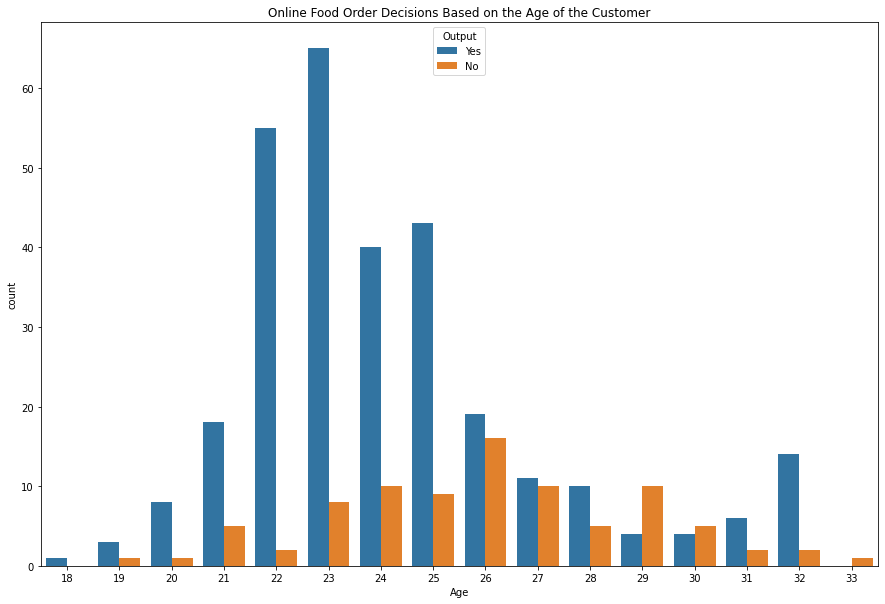

In [118]:
#Online food order decisions on the basis of age of the customer
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.countplot(x="Age", hue="Output", data=df_onlinefoods)
plt.show()

From the above histograph, we can say that the age group between 22 and 25 is ordering food again and again. This means that this age group is the target of online food delivery companies.

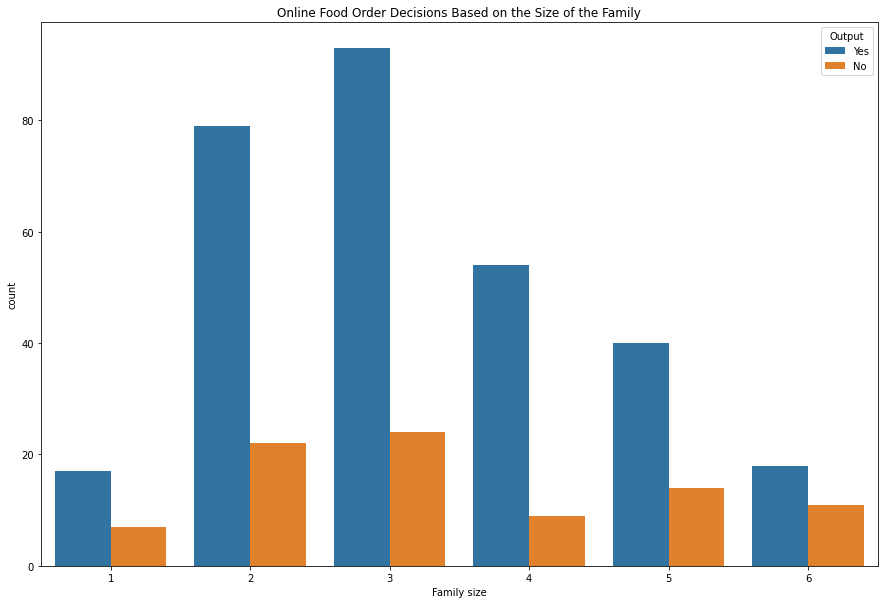

In [119]:
#count plot on the basis of family size
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.countplot(x="Family size", hue="Output",data=df_onlinefoods)
plt.show()

Families with 2 and 3 members order food often. This can be a family, a group of friends or a couple.

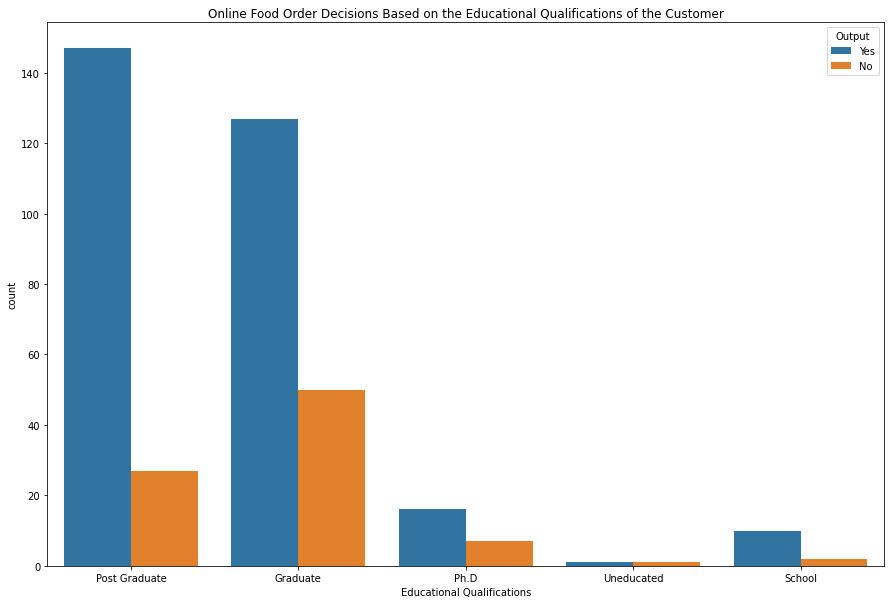

In [120]:
#count on the basis of education
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decisions Based on the Educational Qualifications of the Customer")
sns.countplot(x='Educational Qualifications',data=df_onlinefoods,hue='Output');

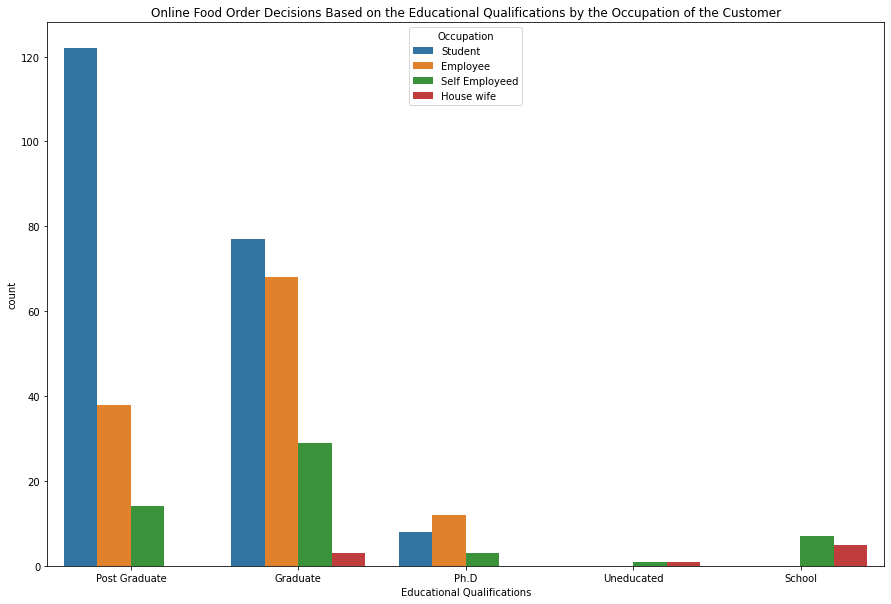

In [121]:
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decisions Based on the Educational Qualifications by the Occupation of the Customer")
sns.countplot(x='Educational Qualifications',data=df_onlinefoods,hue='Occupation');

The vast majority of students who place orders are pursuing a master's degree. The majority of graduates are either students or employees. Students should be the first priority of companies in this situation.

In [122]:
#lets check which gender is more likely to order food again
reorder = df_onlinefoods[df_onlinefoods["Output"] == "Yes"]
df_gender = reorder['Gender'].value_counts()
label = df_gender.index
counts = df_gender.values

colors = ['green','red']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text = "Which Gender is More Likely to Order Online Again?")
fig.update_traces(hoverinfo="label+percent", textinfo="value",marker=dict(colors=colors))

fig.show()

According to the dataset, male customers order more than female customers. 58% of male customers tend to reorder, compared to 41% of female customers.

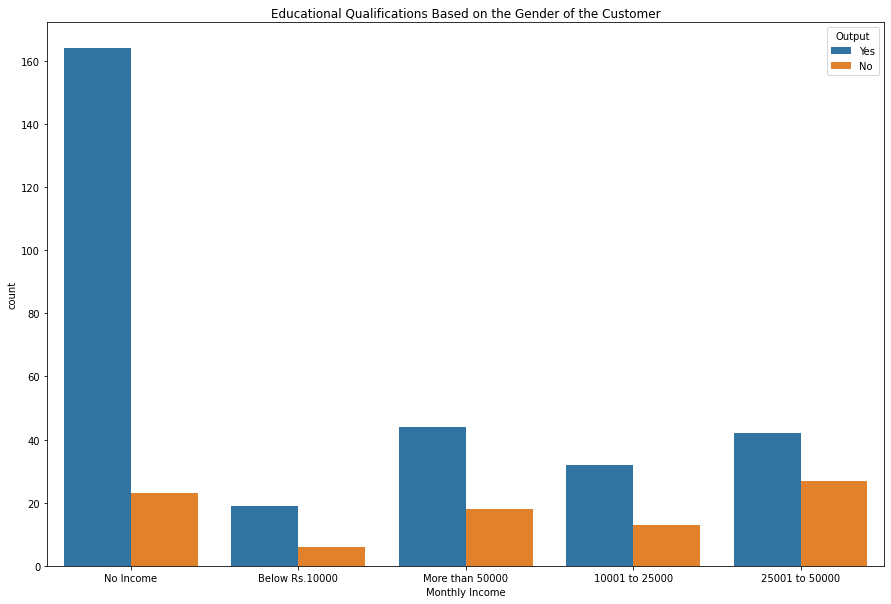

In [123]:
plt.figure(figsize=(15,10))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x='Monthly Income',data=df_onlinefoods,hue='Output');

The above graph indicates that those without income have a higher rate of reordering than those without an order. It may be due to the fact that most of the customers are students without income.

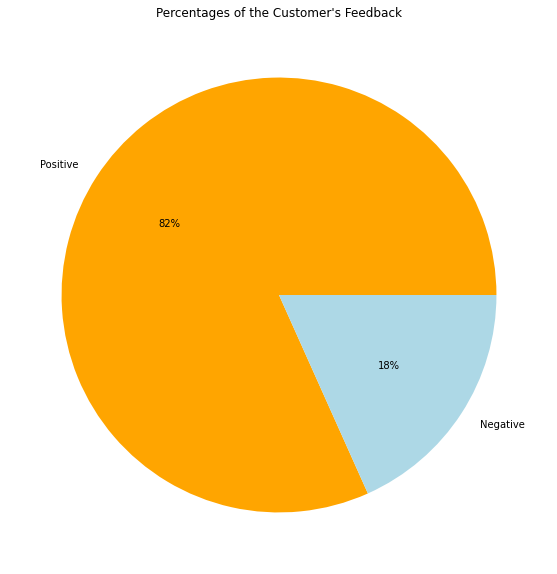

In [124]:
positive = len(df_onlinefoods[df_onlinefoods["Feedback"] == 'Positive']) 
negative = len(df_onlinefoods[df_onlinefoods["Feedback"] == 'Negative ']) 
data_feedback = [positive,negative] 
labels = ['Positive', 'Negative']

colors = ['orange','lightblue']

plt.figure(figsize=(15,10)) 
plt.title("Percentages of the Customer's Feedback") 
plt.pie(data_feedback, labels = labels, colors = colors, autopct='%.0f%%') 
plt.show()

Of the total comments, 82% are positive while 18% are negative. lets check how this rate affect reordering(Output)?

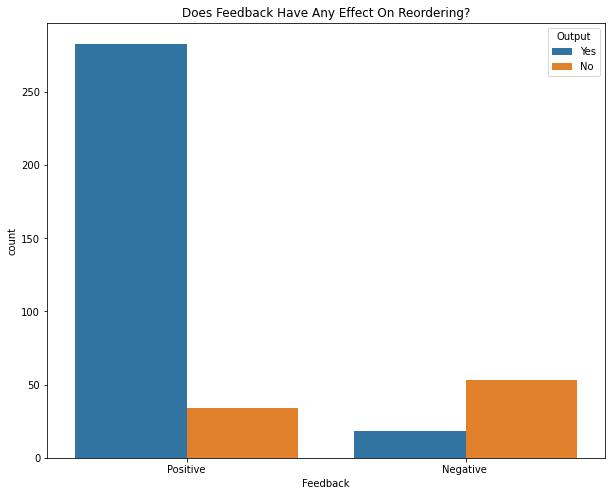

In [125]:
plt.figure(figsize=(10,8)) 
plt.title("Does Feedback Have Any Effect On Reordering?") 
sns.countplot(x='Feedback',data=df_onlinefoods,hue='Output');

According to the plot, most customers with positive feedback will order again, while those with negative feedback are more likely to refrain from doing so.

# ***`Preparing the Data:`***

In [126]:
#convert all the categorical features into numerical values
df_onlinefoods["Gender"] = df_onlinefoods["Gender"].map({"Male": 1, "Female": 0})
print(df_onlinefoods.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20       0         Single    Student       No Income   
1   24       0         Single    Student  Below Rs.10000   
2   22       1         Single    Student  Below Rs.10000   
3   22       0         Single    Student       No Income   
4   22       1         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [127]:
df_onlinefoods["Marital Status"] = df_onlinefoods["Marital Status"].map({"Married": 2, "Single": 1, "Prefer not to say": 0})
df_onlinefoods["Occupation"] = df_onlinefoods["Occupation"].map({"Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4})
df_onlinefoods["Educational Qualifications"] = df_onlinefoods["Educational Qualifications"].map({"Graduate": 1,"Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5})
df_onlinefoods["Monthly Income"] = df_onlinefoods["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
df_onlinefoods["Feedback"] = df_onlinefoods["Feedback"].map({"Positive": 1, "Negative ": 0})
print(df_onlinefoods.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

# ***`Prediction model`***

In [128]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(df_onlinefoods[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y = np.array(df_onlinefoods[["Output"]])

In [129]:
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10,random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

<ipython-input-129-26b7e9e4a349>:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9487179487179487


[[ 3  1]
 [ 1 34]]


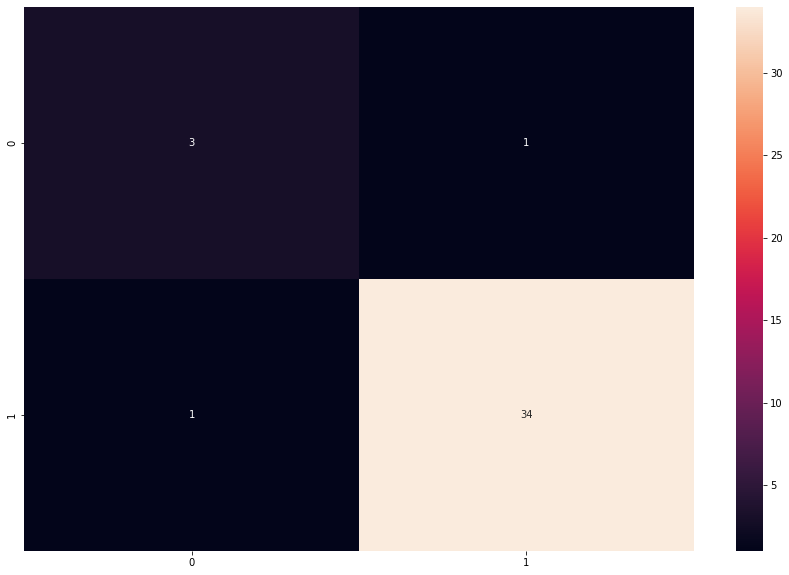

In [130]:
from sklearn.metrics import confusion_matrix
pred = model.predict(xtest)

print(confusion_matrix(pred,ytest))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(pred,ytest), annot=True);

**`Now let’s prepare a form to input the data of the customer and predict whether the customer will order the food again or not`**

In [131]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 10
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 1
Monthly Income: 2000
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 5
Family Size: 1
Pin Code: 908765
Review of the Last Order (1 = Positive, 0 = Negative): 0
Finding if the customer will order again:  ['Yes']
